**Table of contents**<a id='toc0_'></a>   
- 1. [Imports](#toc1_)     
- 2. [OverLapping Generations (OLG) model](#toc2_)    
- 3. [Solution and simulation](#toc3_)    
- 4. [Without Government](#toc4_)  
 4.1. [Simulation](#toc4_1_)      
- 5. [Model with Government](#toc5_)    
- 6. [Affect of Government Spending Spree](#toc6_)    


## 1. <a id='toc1_'></a>[Imports](#toc1_)

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import pandas as pd
sm.init_printing(use_unicode=True)

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
from matplotlib import rc
import matplotlib.ticker as ticker
import ipywidgets as widgets
from OLGMODEL import OLGModelClass
from OLGMODEL import simulate_before_s, simulate_after_s, find_s_bracket, calc_euler_error

C:\Users\click\AppData\Local\Temp\ipykernel_12740\2680176437.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## 2. <a id='toc2_'></a>[OverLapping Generations (OLG) model](#toc2_)


The Overlapping Generations (OLG) Diamond model, developed by Peter Diamond in the 1960s, is a widely used framework in economics to examine intergenerational dynamics and various economic phenomena. This model offers valuable insights into the interactions between different generations, capital accumulation, and economic growth.

One key feature of the OLG Diamond model is its intergenerational aspect. The model assumes that individuals are born into the young generation and progress through the life cycle. When individuals reach the old stage, they retire and transfer their accumulated wealth to the next generation. This intergenerational transfer mechanism is a fundamental aspect of the model and plays a crucial role in determining economic outcomes and welfare.

We will investigate how households optimize their consumption, saving, and labor supply decisions over their lifetimes. By examining the equilibrium conditions of the model, we aim to understand how capital and output per capita develop. We first examine the case when government is not included in the model. We then extend the model to include government.
**Time:** Discrete and indexed by $t\in\{0,1,\dots\}$.

**Demographics:** Population is constant. A life consists of
two periods, *young* and *old*.

**Households:** As young a household supplies labor exogenously, $L_{t}=1$, and earns a after tax wage $(1-\tau_w)w_{t}$. Consumption as young and old
are denoted by $C_{1t}$ and $C_{2t+1}$. The after-tax return on saving is $(1-\tau_{r})r_{t+1}$. Utility is
    
$$
\begin{aligned}
U & =\max_{s_{t}\in[0,1]}\frac{C_{1t}^{1-\sigma}}{1-\sigma}+\beta\frac{C_{1t+1}^{1-\sigma}}{1-\sigma},\,\,\,\beta > -1, \sigma > 0\\
 & \text{s.t.}\\
 & S_{t}=s_{t}(1-\tau_{w})w_{t}\\
 & C_{1t}=(1-s_{t})(1-\tau_{w})w_{t}\\
 & C_{2t+1}=(1+(1-\tau_{r})r_{t+1})S_{t}
\end{aligned}
$$
    
The problem is formulated in terms of the saving rate $s_t\in[0,1]$.

**Firms:** Firms rent capital $K_{t-1}$ at the rental rate $r_{t}^{K}$,
and hires labor $E_{t}$ at the wage rate $w_{t}$. Firms have access
to the production function
    
$$
\begin{aligned}
Y_{t}=F(K_{t-1},E_{t})=(\alpha K_{t-1}^{-\theta}+(1-\alpha)E_{t}^{-\theta})^{\frac{1}{-\theta}},\,\,\,\theta>-1,\alpha\in(0,1)
\end{aligned}
$$
    
Profits are
    
$$
\begin{aligned}
\Pi_{t}=Y_{t}-w_{t}E_{t}-r_{t}^{K}K_{t-1}
\end{aligned}
$$

**Government:** In the first case of the model we assume that government does not exist, so taxes $\tau_w = 0$ and $\tau_r = 0$. In the model extension where government exists, we have that:
public consumption is $G_{t}$, and tax rates $\tau_w \in [0,1]$ and $\tau_r \in [0,1]$. Total tax revenue is
    
$$
\begin{aligned}
T_{t} &=\tau_r r_{t} (K_{t-1}+B_{t-1})+\tau_w w_{t}   
\end{aligned}
$$
    
Government debt accumulates according to
    
$$
\begin{aligned}
B_{t} &=(1+r^b_{t})B_{t-1}-T_{t}+G_{t} 
\end{aligned}
$$
       
A *balanced budget* implies $G_{t}=T_{t}-r_{t}B_{t-1}$.

**Capital:** Depreciates with a rate of $\delta \in [0,1]$.

**Equilibrium:**
1. Households maximize utility
2. Firms maximize profits
3. No-arbitrage between bonds and capital

    $$
    r_{t}=r_{t}^{K}-\delta=r_{t}^{b}
    $$

4. Labor market clears: $E_{t}=L_{t}=1$
5. Goods market clears: $Y_{t}=C_{1t}+C_{2t}+G_{t}+I_{t}$
6. Asset market clears: $S_{t}=K_{t}+B_{t}$
7. Capital follows its law of motion: $K_{t}=(1-\delta)K_{t-1}+I_{t}$


### 3. <a id='toc3_'></a>[Solution and simulation](#toc3_)

**Implication of profit maximization:** From FOCs our rental rate of capital and wage rate look like:

$$
\begin{aligned}
r_{t}^{k} & =F_{K}(K_{t-1},E_{t})=\alpha K_{t-1}^{-\theta-1}Y_{t}^{1+\theta}\\
w_{t} & =F_{E}(K_{t-1},E_{t})=(1-\alpha)E_{t}^{-\theta-1}Y_{t}^{1+\theta}
\end{aligned}
$$

**Implication of utility maximization:** From FOCs our euler ewaution looks like:

$$
\begin{aligned}
C_{1t}^{-\sigma}=\beta (1+(1-\tau_r)r_{t+1})C_{2t+1}^{-\sigma}
\end{aligned}
$$

**Simulation algorithm:** At the beginning of period $t$, the
economy can be summarized in the state variables $K_{t-1}$ and $B_{t-1}$.  *Before* $s_t$ is known, we can calculate:

$$
\begin{aligned}
Y_{t} & =F(K_{t-1},1)\\
r_{t}^{k} & =F_{K}(K_{t-1},1)\\
w_{t} & =F_{E}(K_{t-1},1)\\
r_{t} & =r^k_{t}-\delta\\
r_{t}^{b} & =r_{t}\\
\tilde{r}_{t} & =(1-\tau_{r})r_{t}\\
C_{2t} & =(1+\tilde{r}_{t})(K_{t-1}+B_{t-1})\\
T_{t} & =\tau_{r}r_{t}(K_{t-1}+B_{t-1})+\tau_{w}w_{t}\\
B_{t} & =(1+r^b_{t})B_{t-1}+T_{t}-G_{t}\\
\end{aligned}
$$

*After* $s_t$ is known we can calculate:

$$
\begin{aligned}
C_{1t} & = (1-s_{t})(1-\tau_{w})w_{t}\\
I_{t} & =Y_{t}-C_{1t}-C_{2t}-G_{t}\\
K_{t} & =(1-\delta)K_{t-1} + I_t
\end{aligned}
$$

**Solution algorithm:** We simulate forward choosing $s_{t}$ such
that the follwwing always holds:

$$
\begin{aligned}
C_{1t}^{-\sigma}=\beta(1+\tilde{r}_{t+1})C_{2t+1}^{-\sigma}
\end{aligned}
$$

**Implementation of the simulation:**

1. We use a bisection root-finder to determine $s_t$
2. Low $s_t$ $\rightarrow$ A lot of consumption today. Low marginal utility. LHS < RHS.
3. High $s_t$ $\rightarrow$ Little consumption today. High marginal utility. LHS > RHS.
4. Problem: Too low $s_t$ might not be feasible if $B_t > 0$.

**Note:** Never errors in the Euler-equation due to *perfect foresight*.

**Assumptions**
1. Production is Cobb-Douglas ($\theta = 0$)
2. Utility is logarithmic ($\sigma = 1$)

### 4. <a id='toc4_'></a>[Without Government](#toc4_)

Inour first model case we have the follwing due to the lack of government in the model:

$\tau_w=\tau_r=0$, $T_t = G_t = 0$ and $B_t = 0$

**Analytical steady state:** It can be proven that:

$$ \lim_{t\rightarrow\infty} K_t = \left(\frac{1-\alpha}{1+1/\beta}\right)^{\frac{1}{1-\alpha}} $$

We now implement the parameter-values introduced above such that we can simulate the model without government

In [2]:
# We define the model
model = OLGModelClass()
par = model.par # SimpeNamespace
sim = model.sim # SimpeNamespace

# no government
par.tau_w = 0.0
par.tau_r = 0.0
#sim.balanced_budget[:] = True # G changes to achieve this

# steady state and initial values
K_ss_1 = ((1-par.alpha)/((1+1.0/par.beta)))**(1/(1-par.alpha))


### 4.1 <a id='toc4_1_'></a>[Simulation ](#toc4_1_)

We now simulate the model and store the capital and production development

In [3]:
# Simulation
model.simulate()
# steady state production
Y_ss_1 = sim.Y[-1]

# Dataframes that collect model capital and porduciton without government
K_noGov = model.sim.K_lag.copy()
Y_noGOV = model.sim.Y.copy()

### 5 <a id='toc5_'></a>[Model with Government](#toc5_)

With Government we now set the follwing parameter values to be some level > 0:

$\tau_w=0.1$, $\tau_r=0.2$

$T_t = G_t = B_t > 0$

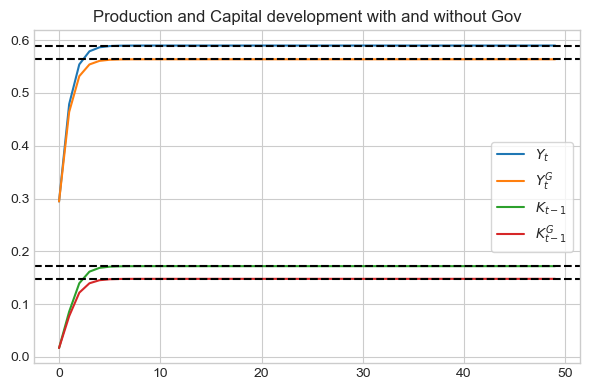

In [7]:
# Call the model again including Government
model = OLGModelClass()
par = model.par
sim = model.sim
model.simulate()

K_ss_2 = sim.Y[-1]
Y_ss_2 = sim.K_lag[-1]

K_Gov = model.sim.K_lag.copy()
Y_GOV = model.sim.Y.copy()

# Illustration of production and capital with and without Gov
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(Y_noGOV, label=r'$Y_{t}$')
ax.plot(Y_GOV, label=r'$Y_{t}^G$')
ax.plot(K_noGov,label=r'$K_{t-1}$')
ax.plot(K_Gov,label=r'$K_{t-1}^G$')

#steady state
ax.axhline(K_ss_1,ls='--',color='black')
ax.axhline(Y_ss_1,ls='--',color='black')
ax.axhline(K_ss_2,ls='--',color='black')
ax.axhline(Y_ss_2,ls='--',color='black')

# layout formatting
ax.legend(frameon=True)
ax.set_title('Production and Capital development with and without Gov')
fig.tight_layout()


We immediatly see that the steady state values of capital and production are lower in the OlG model with Government.
This implies that the mere existence of a government that imposes taxes and takes on public debt in the OLG model leads to a loss in income as the economy approaches its steady state level.  

### 6 <a id='toc6_'></a>[Affect of Government Spending Spree](#toc6_)

We now assume that the Government is introduced to the economy, after it has reached its steady state level. We then assume that the Government goes on a spending spree for T=3 periods. We evaluate how this affects the steady state level of capital and production.

Text(0.5, 1.0, 'Production and Capital development after spending spree')

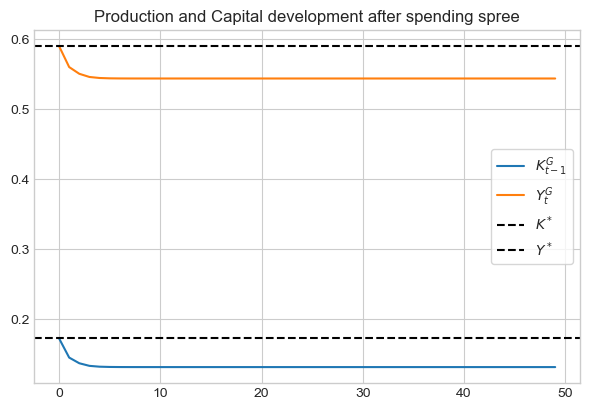

In [10]:
# Government steady state values
B_ss = sim.B_lag[-1]
G_ss = sim.G[-1]

# set the inmitial capital stock to be equal to the noGov steady state level
par.B_lag_ini = B_ss
par.K_lag_ini = K_ss_1

# Government goes on a spending spree
T0 = 0
dT = 3
sim.G[T0:T0+dT] = 1.05*G_ss
sim.balanced_budget[:T0] = True #G adjusts
sim.balanced_budget[T0:T0+dT] = False # B adjusts
sim.balanced_budget[T0+dT:] = True # G adjusts

# simulate economy with spending spree
model.simulate()

# Illustration of production and capital
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(model.sim.K_lag,label=r'$K_{t-1}^G$')
ax.plot(model.sim.Y, label=r'$Y_{t}^G$')

# steady state
ax.axhline(K_ss_1,ls='--',color='black',label='$K^*$')
ax.axhline(Y_ss_1,ls='--',color='black',label='$Y^*$')

# layout formatting
ax.legend(frameon=True)
ax.set_title('')
fig.tight_layout()
ax.set_title('Production and Capital development after spending spree')

We see that the economies capital and production transition to a lower steady state after the government goes on a three preiod spending spree.

All in all we can conclude from this analysis that the OLG model dynamics imply that when government is introduced, the result is an income loss.
Furthermore we conclude that this income loss can both occur if government is introduced before the economy begins to develop towards its steady state level, and after it has reached its steady state level given that the government goes on a spending spree.